In [1]:
from diffusers import StableDiffusionXLPipeline
import torch
import matplotlib.pyplot as plt

# Load the SDXL base pipeline
pipe = StableDiffusionXLPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0", 
    torch_dtype=torch.float32 # change to float 16 if vram is limited
).to("cuda")

pipe.vae = pipe.vae.from_pretrained(
    "madebyollin/sdxl-vae-fp16-fix", 
    torch_dtype=torch.float32 # change to float 16 if vram is limited
).to("cuda")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

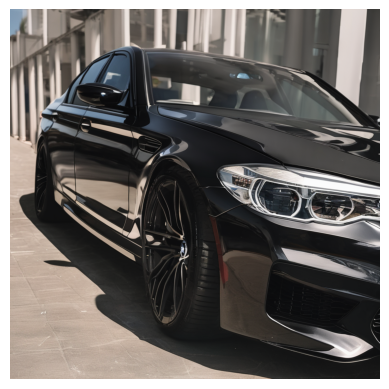

In [2]:
# Set your prompt
prompt = "a black bmw m5"

# Generate the image
with torch.autocast("cuda"):
    image = pipe(prompt=prompt).images[0]

# Show the image
plt.imshow(image)
plt.axis("off")
plt.show()